<h1>Lesson 5. Model selection: US Salary Prediction</h1>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline
np.random.seed(1)

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


train=pd.read_csv('../data/census-training.csv')
print(train.info())
train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   EducationNum   48842 non-null  int64 
 2   MaritalStatus  48842 non-null  object
 3   Occupation     48842 non-null  object
 4   Relationship   48842 non-null  object
 5   Race           48842 non-null  object
 6   Gender         48842 non-null  object
 7   Hours/Week     48842 non-null  int64 
 8   Country        48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [2]:
# TODO -> DONE
train.nunique()

Age              74
EducationNum     16
MaritalStatus     7
Occupation       15
Relationship      6
Race              5
Gender            2
Hours/Week       96
Country          42
Income            4
dtype: int64

<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [3]:
# Command (s): remove the '?' special character and replace with NaN
# TODO -> DONE
train = train.replace('?',np.NaN)
train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64

<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [4]:
# Reference: https://stackoverflow.com/questions/42711167/replacing-empty-string-with-mode-of-the-column

# Command(s):
import numbers

# finding mode to compute the most occuring item in every column
train.mode() 

#replace missing values with their mode
train.fillna(train.mode().iloc[0], inplace=True)

# TODO -> DONE
train.isnull().sum() #checking the data for NaN values .... should all show 0 now

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,36,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K


Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [5]:
train.Gender.value_counts()
train.Income.value_counts()

Male      32650
Female    16192
Name: Gender, dtype: int64

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: Income, dtype: int64

In [6]:
# converting Gender to "0" and "1" 
def gender_to_numeric(x):
    #TODO return 1 if gender is Male, 0 otherwise
    if x=='Male':
        return 1
    else:
        return 0

# TODO apply the function to this column -> DONE
train['Gender'] = train.Gender.apply(lambda x: gender_to_numeric(x))

# converting Inccome to "0" and "1" 
def income_to_numeric(x):
    #TODO return 1 if income is greater than 50k, 0 otherwise
    if x=='>50K':
        return 1
    else:
        return 0

# TODO apply the function to this column -> DONE
train['Income'] = train.Income.apply(lambda x: income_to_numeric(x))

train.Gender.value_counts()
train.Income.value_counts()
train.head(10)

1    32650
0    16192
Name: Gender, dtype: int64

0    41001
1     7841
Name: Income, dtype: int64

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,0
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,0
4,18,10,Never-married,Prof-specialty,Own-child,White,0,30,United-States,0
5,34,6,Never-married,Other-service,Not-in-family,White,1,30,United-States,0
6,29,9,Never-married,Prof-specialty,Unmarried,Black,1,40,United-States,0
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,1,32,United-States,0
8,24,10,Never-married,Other-service,Unmarried,White,0,40,United-States,0
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,1,10,United-States,0


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [7]:
# Command(s) 
cols = train.select_dtypes(include=['object']).columns #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
for col in cols:
    #TODO  #Encode input data -> DONE
    train[col] = le.fit_transform(train[col])

train.dtypes
train.head(10) #Inspect the data, all features should be numeric now

Age              int64
EducationNum     int64
MaritalStatus    int64
Occupation       int64
Relationship     int64
Race             int64
Gender           int64
Hours/Week       int64
Country          int64
Income           int64
dtype: object

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,0
1,38,9,2,4,0,4,1,50,38,0
2,28,12,2,10,0,4,1,40,38,0
3,44,10,2,6,0,2,1,40,38,0
4,18,10,4,9,3,4,0,30,38,0
5,34,6,4,7,1,4,1,30,38,0
6,29,9,4,9,4,2,1,40,38,0
7,63,15,2,9,0,4,1,32,38,0
8,24,10,4,7,4,4,0,40,38,0
9,55,4,2,2,0,4,1,10,38,0


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [8]:
#TODO -> DONE
y = train['Income']
X = train.drop(['Income'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

Accuracy: 0.8388725858186037
AUC: 0.5522717257092258


/home/kegedy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


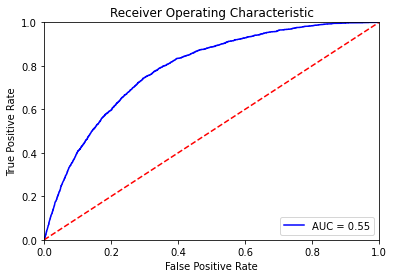

In [9]:
# Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
# sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#                                   intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', 
#                              max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, 
#                         l1_ratio=None)


# TODO Initialize logistic regression classifier -> DONE
log_rgr = LogisticRegression()

# TODO: fit X_train and y_train -> DONE
log_rgr.fit(X_train,y_train)


#predict on the test set

#TODO -> DONE
y_pred = log_rgr.predict(X_test)

#TODO: Compute the accuracy score -> DONE
# sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None
lr_acc = accuracy_score(y_test,y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

# TODO -> DONE
# sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, 
#                          max_fpr=None, multi_class='raise', labels=None)
roc_auc = roc_auc_score(y_test,y_pred)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {round(roc_auc,2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

Accuracy: 0.833344707568416
AUC: 0.5852805759055759


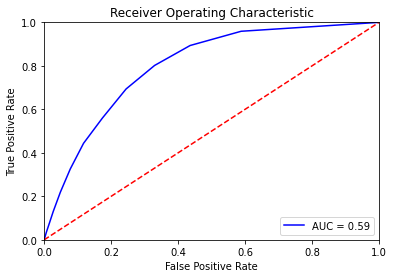

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', 
#                               leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

# Initialize the classifier
# TODO Initialize KNN classifier with k=15 -> DONE
knn = KNeighborsClassifier(15)

# TODO: fit X_train and y_train -> DONE
knn.fit(X_train,y_train)

# TODO -> DONE 
y_pred = knn.predict(X_test)

# TODO: Compute the accuracy score -> DONE
knn_acc = accuracy_score(y_test,y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

# TODO -> DONE
roc_auc = roc_auc_score(y_test,y_pred) 
print("Accuracy: {}".format(knn_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {round(roc_auc,2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [11]:
metrics_LR = pd.DataFrame.from_dict({'Accuracy':0.837098205145704, 'AUC':0.550974485837441},
                                   columns=['LR'],orient='index')
metrics_KNN = pd.DataFrame.from_dict({'Accuracy':0.8334811983894083, 'AUC':0.5856432972992394},
                                   columns=['KNN'],orient='index')
myMetrics = metrics_LR.join(metrics_KNN)
round(myMetrics,2)

,LR,KNN
Accuracy,0.84,0.83
AUC,0.55,0.59


In [12]:
# Compare results

# The AUC score improved in the KNN model but the accuracy decreased. 
# It is usually more desirable to have a better AUC score.
# Both AUC scores are not much better than 50-50 chance.

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

In [13]:
from sklearn.feature_selection import RFE
# sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0)

# TODO -> DONE
model = LogisticRegression()
rfe =  RFE(model, 5)

# TODO: fit X_train and y_train
rfe.fit(X_train, y_train)

# TODO
y_pred = rfe.predict(X_test)

#TODO: Compute the accuracy score
lr_acc = accuracy_score(y_test,y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

#TODO
roc_auc = roc_auc_score(y_test,y_pred) 
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

FI = pd.DataFrame(index=X_train.columns)
FI['ranking'] = rfe.ranking_
FI['support'] = rfe.support_

/home/kegedy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/kegedy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

Accuracy: 0.8406469664915035
AUC: 0.5289557758307758


In [14]:
metrics_LR_new = pd.DataFrame.from_dict({'Accuracy':0.8407834573124957, 'AUC':0.5316204043091719},
                                   columns=['LR_New'],orient='index')
myMetrics = myMetrics.join(metrics_LR_new)
round(myMetrics,2)

,LR,KNN,LR_New
Accuracy,0.84,0.83,0.84
AUC,0.55,0.59,0.53


In [15]:
FI.sort_values(['ranking'])

,ranking,support
EducationNum,1,True
MaritalStatus,1,True
Relationship,1,True
Race,1,True
Gender,1,True
Age,2,False
Hours/Week,3,False
Occupation,4,False
Country,5,False


<p>
<b>Comments</b>

The reduced logistic regression (RFE implementation) has a slightly better accuracy score than the normal logistic regression learner. This is somewhat expected because feature importance is chosen from accuracy. The reduced model also has a slightly lower AUC score than the full logistic regression learner. The selected features are shown in the FI dataframe. Rank is assigned such that 1 is the most important. In this dataset, 'Age', 'Hourse/Week', 'Occupation', and 'Country' where not chosen in the model for higher income.
</p>